In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy

import tensorflow as tf

import keras
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding, Flatten, \
Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.layers.experimental.preprocessing import TextVectorization
from keras.models import Sequential, load_model
from keras import initializers, regularizers, optimizers, layers
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant


# !pip install -q -U keras-tuner
# import kerastuner as kt

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


import re

from IPython.display import display 

import seaborn as sns
import matplotlib.pyplot as plt
from src import load_text, get_word_index

!python -m spacy download en_core_web_lg
import en_core_web_lg


sns.set(context = 'notebook', style = 'whitegrid')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',50)

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


You should consider upgrading via the 'C:\Users\caell\new_Anaconda3\python.exe -m pip install --upgrade pip' command.


https://towardsdatascience.com/hands-on-nlp-deep-learning-model-preparation-in-tensorflow-2-x-2e8c9f3c7633

GloVe embeddigns thanks to Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation. [pdf] [bib]




Thanks to https://keras.io/examples/nlp/pretrained_word_embeddings/ and Kefei Mo https://towardsdatascience.com/hands-on-nlp-deep-learning-model-preparation-in-tensorflow-2-x-2e8c9f3c7633 

for the below

In [3]:
df = load_text(sentences=True, grammarize=False)
word_index = get_word_index(df)
X = df.Text
y = df.Grade
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state = 42, test_size = 0.2)
#fit the vectorizer on the text and extract the corpus vocabulary

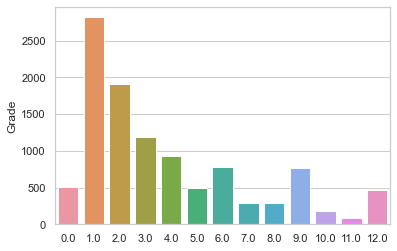

In [4]:
sns.barplot(x=y.unique(),y=y.value_counts())

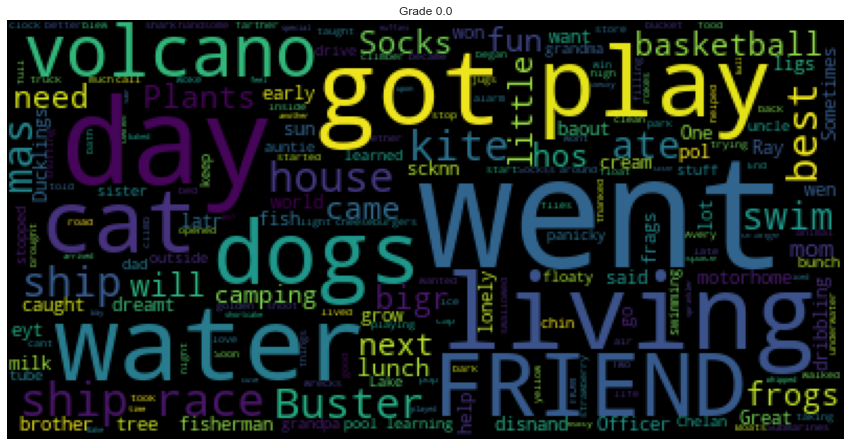

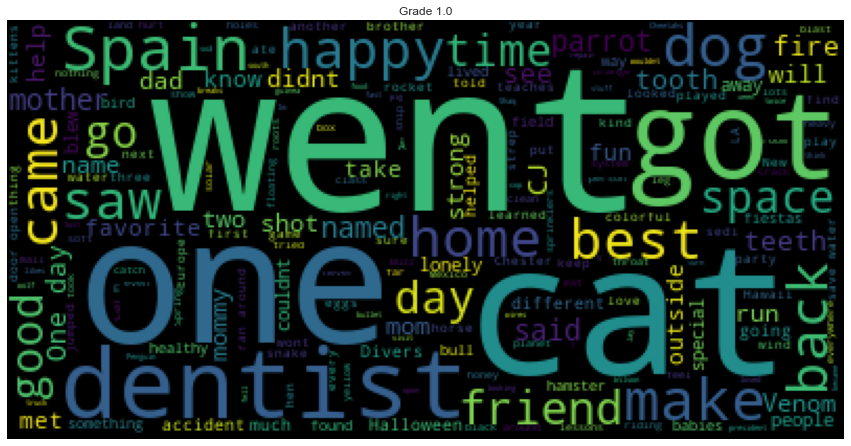

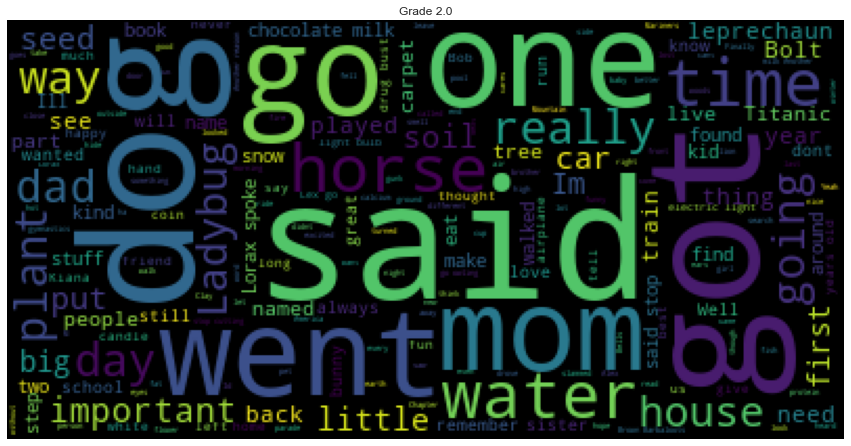

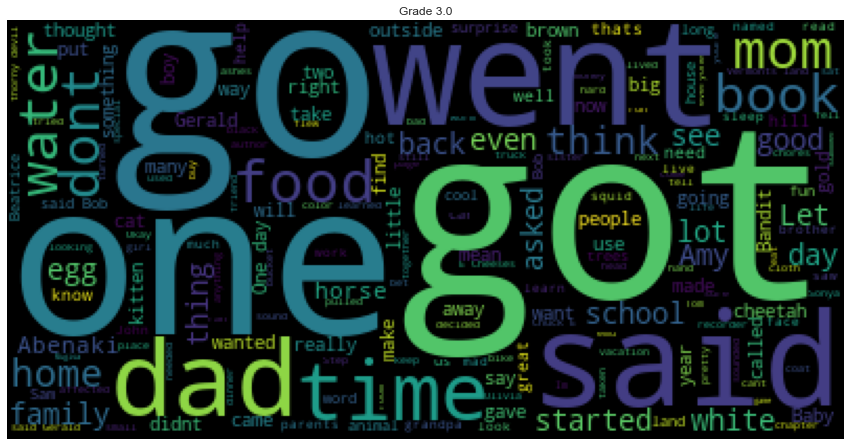

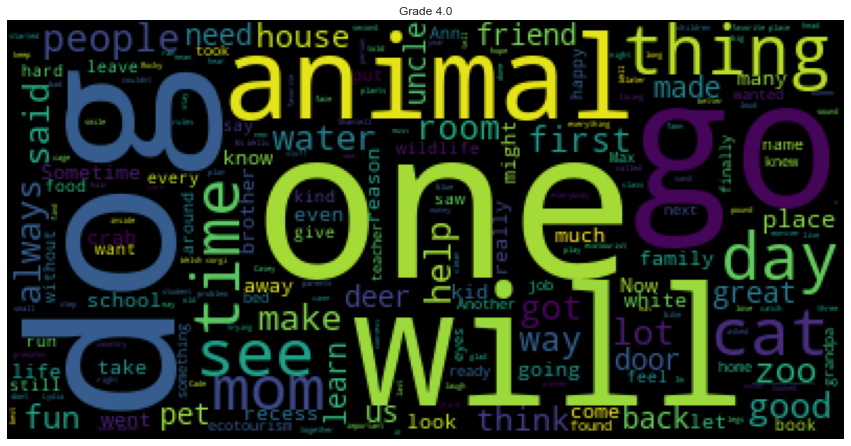

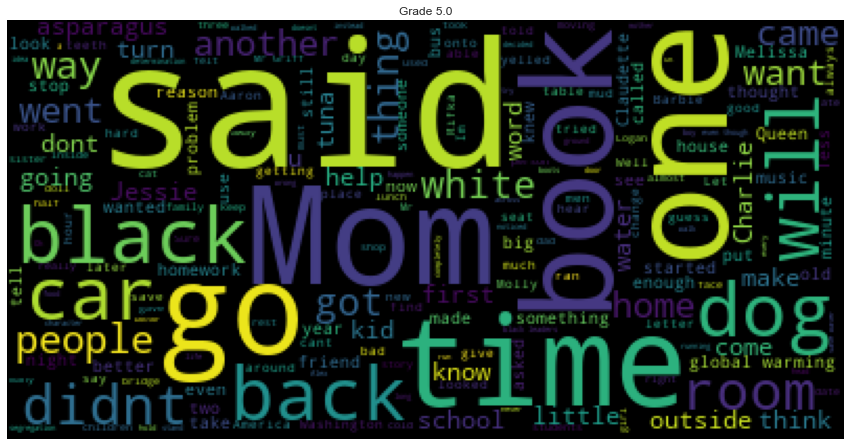

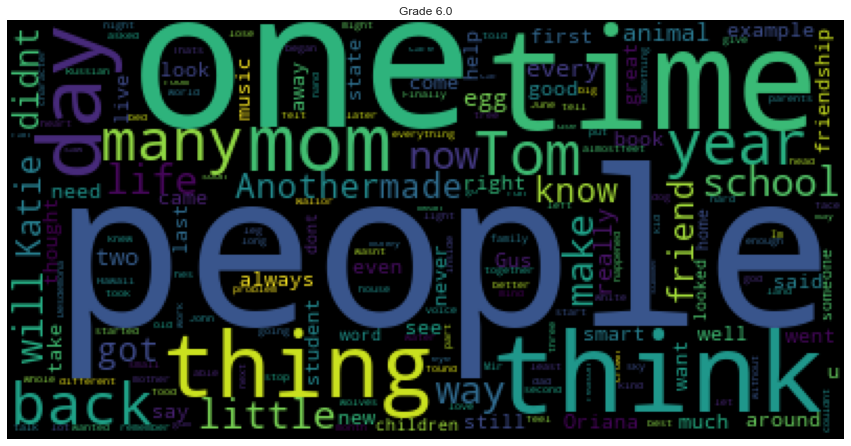

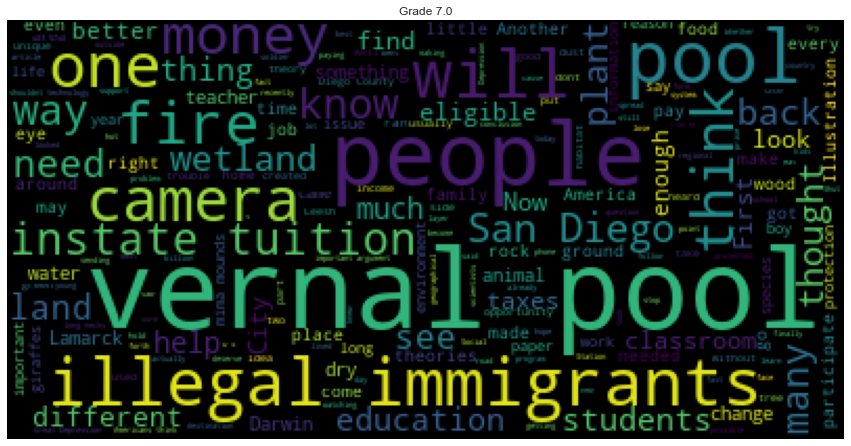

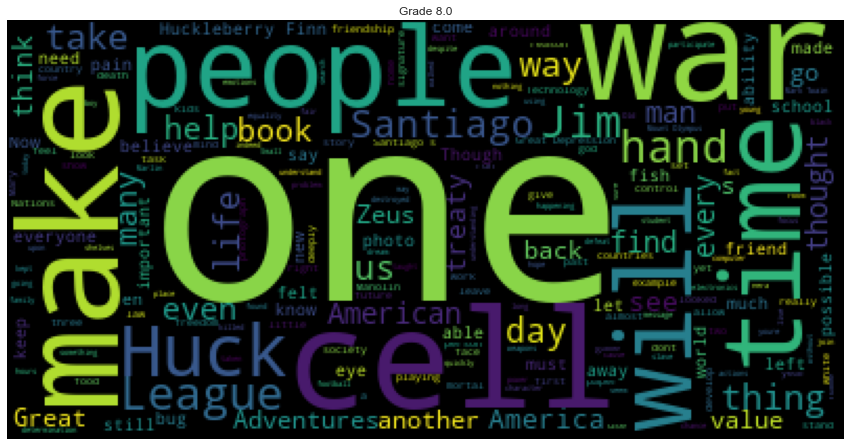

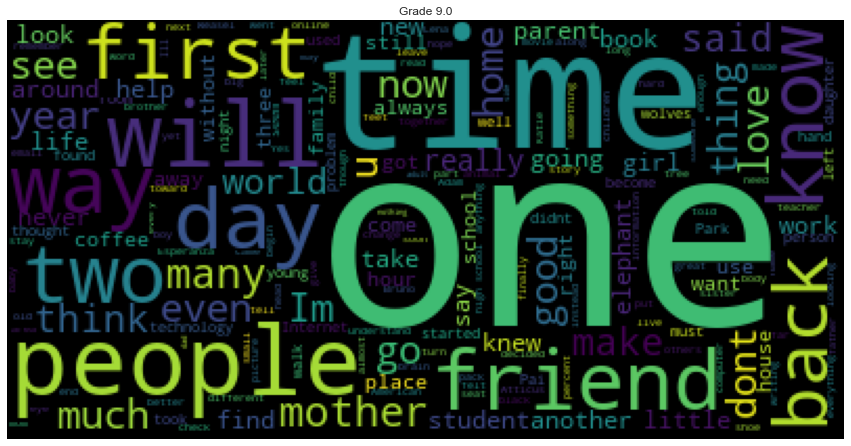

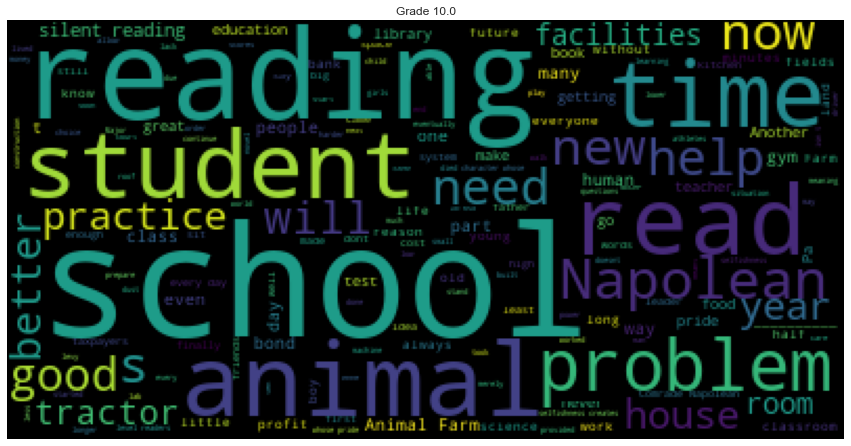

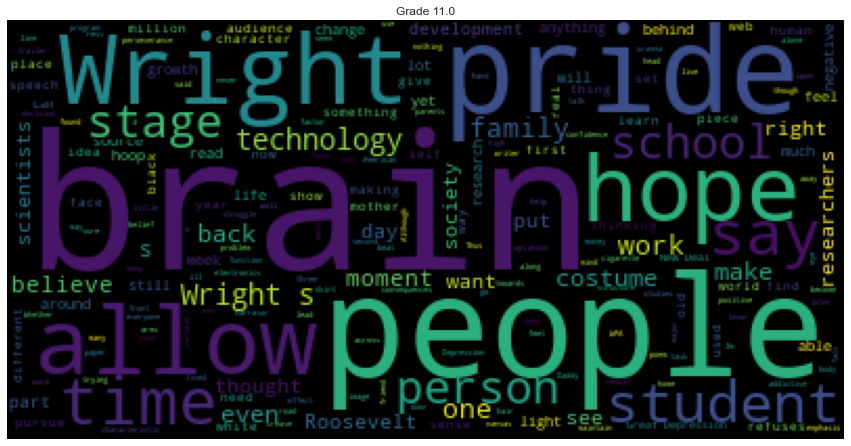

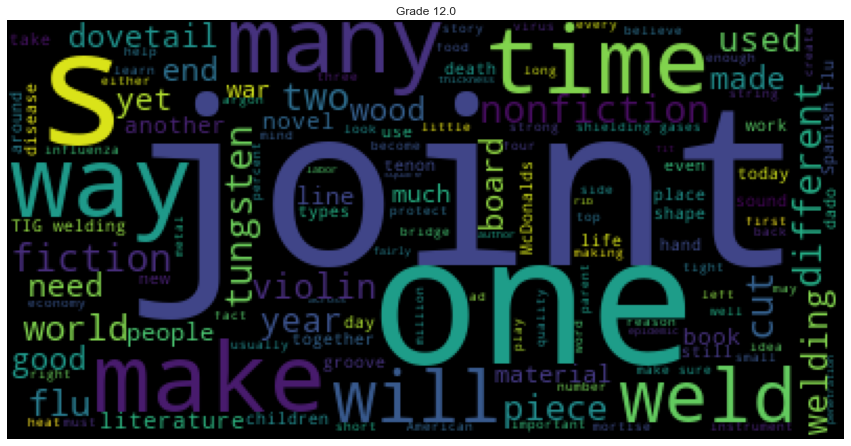

In [5]:
for grade in sorted(df.Grade.unique()):
    text = ' '.join([story for story in df.loc[df.Grade == grade, 'Text']])
    wordcloud = WordCloud().generate(text)
    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud)
    plt.title('Grade {}'.format(grade))
    plt.axis('off')
    plt.show()

# Random Forest Regressor

In [14]:
Vectorizer = TextVectorization(output_mode='tf-idf', max_tokens=2000)
Vectorizer.adapt(X_t.to_numpy())
X_t_tfidf = Vectorizer(X_t)
X_val_tfidf = Vectorizer(X_val)

RF_reg = RandomForestRegressor().fit(X_t_tfidf, y_t)
yhat = RF_reg.predict(X_val_tfidf)
mae = np.sum(np.abs(y_val - yhat))/len(y_val)
print('MAE for TF-IDF vectors = ', mae)

mae =  2.147068364113898


# Multi-Layer Perceptron

Epoch 1/100
56/59 [===========================>..] - ETA: 0s - loss: 4.6076
Epoch 00001: val_loss improved from inf to 2.85199, saving model to best-MLP
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: best-MLP\assets
59/59 [==============================] - 6s 95ms/step - loss: 4.5463 - val_loss: 2.8520
Epoch 2/100
56/59 [===========================>..] - ETA: 0s - loss: 2.8852
Epoch 00002: val_loss improved from 2.85199 to 2.59904, saving model to best-MLP
INFO:tensorflow:Assets written to: best-MLP\assets
59/59 [==============================] - 5s 85ms/step - loss: 2.8773 - val_loss: 2.5990
Epoch 3/100
58/59 [============================>.] - ETA: 0s - loss: 2.5527
Epoch 00003: val_loss did not improve from 2.59904
59/59 [==============================] - 0s 8ms/ste

57/59 [===========================>..] - ETA: 0s - loss: 0.9220
Epoch 00068: val_loss did not improve from 1.88290
59/59 [==============================] - 0s 8ms/step - loss: 0.9190 - val_loss: 1.9030
Epoch 69/100
56/59 [===========================>..] - ETA: 0s - loss: 0.9309
Epoch 00069: val_loss improved from 1.88290 to 1.88155, saving model to best-MLP
INFO:tensorflow:Assets written to: best-MLP\assets
59/59 [==============================] - 6s 96ms/step - loss: 0.9325 - val_loss: 1.8816
Epoch 70/100
58/59 [============================>.] - ETA: 0s - loss: 0.9025
Epoch 00070: val_loss did not improve from 1.88155
59/59 [==============================] - 1s 9ms/step - loss: 0.9021 - val_loss: 1.8949
Epoch 71/100
57/59 [===========================>..] - ETA: 0s - loss: 0.9129
Epoch 00071: val_loss did not improve from 1.88155
59/59 [==============================] - 1s 9ms/step - loss: 0.9144 - val_loss: 1.9262
Epoch 72/100
57/59 [===========================>..] - ETA: 0s - loss: 0

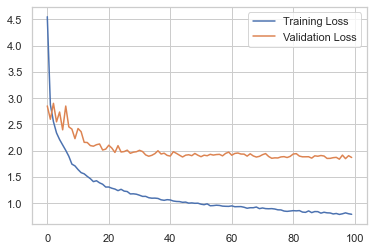

MAE =  1.74957033757047
mean grade prediction =  6.766169
mean grade =  6.894967177242888


Text  \
3846                                                        A billboard examined closely advertises Lamour not Coca - Cola    
5427   Also some kids who have big projects or posters would rather work where it is quiet and they can concentrate better    
2238                                                                                       My hair still smells like smoke    
6659                                                                           And one day they found the king of New York    
4441                                                                          We knew others had done so on previous trips    

      Grade  Predicted Grade  
3846    9.0         9.058386  
5427    5.0         6.032573  
2238    2.0         8.041213  
6659    1.0         3.339352  
4441    9.0         6.015384

In [6]:

model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))
model.add(Vectorizer2)
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(1, activation='relu'))
sgd = optimizers.SGD(learning_rate=0.1, decay=1e-2)
model.compile(optimizer='adam', loss='mean_absolute_error')
filepath = 'best-MLP'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True,
                             mode='min',
                             save_format='tf'
                             )
callbacks = [checkpoint]

history = model.fit(X_train,
            y_train,
            epochs=100,
            batch_size=100,
            validation_split = .2,
            verbose=1,
            callbacks=callbacks)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

model = keras.models.load_model(filepath)
yhat = model.predict(X_test).ravel()
print('MAE = ', np.sum(np.abs(y_test-yhat))/len(y_test))
print('mean grade prediction = ', np.mean(model.predict(X_test)))
print('mean grade = ', np.mean(y_test))

errors = df.loc[y_test.index][['Text','Grade']]
errors['Predicted Grade'] = yhat
errors.sample(5)

In [16]:
longest_sentence = X_train.str.len().max()
Vectorizer = TextVectorization(output_sequence_length=longest_sentence, max_tokens=2000)
Vectorizer.adapt(X_train.to_numpy())
nlp = en_core_web_lg.load()
vocab = Vectorizer.get_vocabulary()
#generate the embedding matrix
num_tokens = len(vocab)
embedding_dim = len(nlp('The').vector)
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for i, word in enumerate(vocab):
    embedding_matrix[i] = nlp(word).vector

#Load the embedding matrix as the weights matrix for the embedding layer and set trainable to False
Embedding_layer=Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=Constant(embedding_matrix),
    trainable=False)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_8 (TextVe (None, 815)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 815, 300)          600000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 815, 100)          160400    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               12928     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)              

Epoch 24/100
59/59 [==============================] - ETA: 0s - loss: 1.7463
Epoch 00024: val_loss did not improve from 1.99966
59/59 [==============================] - 408s 7s/step - loss: 1.7463 - val_loss: 2.0359
Epoch 25/100
59/59 [==============================] - ETA: 0s - loss: 1.7152
Epoch 00025: val_loss improved from 1.99966 to 1.93973, saving model to model-LSTM-best
INFO:tensorflow:Assets written to: model-LSTM-best\assets
59/59 [==============================] - 407s 7s/step - loss: 1.7152 - val_loss: 1.9397
Epoch 26/100
59/59 [==============================] - ETA: 0s - loss: 1.6740
Epoch 00026: val_loss improved from 1.93973 to 1.93714, saving model to model-LSTM-best
INFO:tensorflow:Assets written to: model-LSTM-best\assets
59/59 [==============================] - 423s 7s/step - loss: 1.6740 - val_loss: 1.9371
Epoch 27/100
59/59 [==============================] - ETA: 0s - loss: 1.6832
Epoch 00027: val_loss did not improve from 1.93714
59/59 [===========================

Epoch 61/100
59/59 [==============================] - ETA: 0s - loss: 1.2739
Epoch 00061: val_loss did not improve from 1.89820
59/59 [==============================] - 395s 7s/step - loss: 1.2739 - val_loss: 2.0257
Epoch 62/100
59/59 [==============================] - ETA: 0s - loss: 1.2587
Epoch 00062: val_loss did not improve from 1.89820
59/59 [==============================] - 396s 7s/step - loss: 1.2587 - val_loss: 1.9986
Epoch 63/100
59/59 [==============================] - ETA: 0s - loss: 1.2609
Epoch 00063: val_loss did not improve from 1.89820
59/59 [==============================] - 395s 7s/step - loss: 1.2609 - val_loss: 1.9913
Epoch 64/100
59/59 [==============================] - ETA: 0s - loss: 1.2589
Epoch 00064: val_loss did not improve from 1.89820
59/59 [==============================] - 395s 7s/step - loss: 1.2589 - val_loss: 1.9956
Epoch 65/100
59/59 [==============================] - ETA: 0s - loss: 1.2357
Epoch 00065: val_loss did not improve from 1.89820
59/59 [=

Epoch 99/100
59/59 [==============================] - ETA: 0s - loss: 1.1114
Epoch 00099: val_loss did not improve from 1.89820
59/59 [==============================] - 395s 7s/step - loss: 1.1114 - val_loss: 1.9427
Epoch 100/100
59/59 [==============================] - ETA: 0s - loss: 1.1269
Epoch 00100: val_loss did not improve from 1.89820
59/59 [==============================] - 395s 7s/step - loss: 1.1269 - val_loss: 1.9743


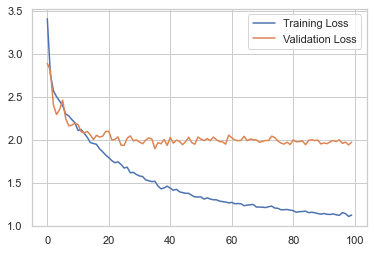

MAE =  1.8490826650573597
mean grade prediction =  6.781108
mean grade =  6.894967177242888


Text  \
7831                                                                                                                                      Another time Tom steals a whole leg of a ham    
8622                                                               Students can ’ t even go to the library when they need to because Health , Media , and other classes are held there    
1421                                                                                                                           two old enemies worked together as friends ( Chien 99 )    
8418   Further examples of her abysmal character and unfaithfulness are revealed when Bruno ’ s mother finds the young lieutenant and says , “Oh Kurt , precious , you ’ re still here    
3545                                                                                                                                    So that little picture is my prized possession    

      Grade  Predicted Grade  
7831    6.0         5.848661  
8622   10.0         8.537878  
1421    6.0         5.873523  
8418    9.0         8.962831  
3545    9.0         8.320878

In [18]:
filepath = 'model-LSTM-best'
model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))
model.add(Vectorizer)
model.add(Embedding_layer)
model.add(LSTM(100, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)))  
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)))  
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4))) 
model.add(Dropout(0.3))

model.add(Dense(1))

adam = optimizers.Adam(learning_rate=.01, decay=1e-3)
model.compile(optimizer = adam, loss = 'mean_absolute_error', metrics = None)

print(model.summary())
checkpoint = ModelCheckpoint(filepath, monitor='val_loss',verbose=1, 
                             save_best_only=True,
                             mode='min',
                             save_format='tf')
callbacks = [checkpoint]

history = model.fit(X_train, y_train,
                     batch_size=100,
                     epochs=100,
                     validation_split=.2,
                    callbacks=callbacks
                    )

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

model = keras.models.load_model(filepath)
yhat = model.predict(X_test).ravel()
print('MAE = ', np.sum(np.abs(y_test-yhat))/len(y_test))
print('mean grade prediction = ', np.mean(model.predict(X_test)))
print('mean grade = ', np.mean(y_test))

errors = df.loc[y_test.index][['Text','Grade']]
errors['Predicted Grade'] = yhat
errors.sample(5)

# Hybrid

In [ ]:
filepath = 'model-LSTM-MLP-hybrid'
model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))
model.add(Vectorizer)
model.add(Embedding_layer)
model.add(LSTM(100, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(1, activation='relu'))
sgd = optimizers.SGD(learning_rate=0.1, decay=1e-2)
model.compile(optimizer='adam', loss='mean_absolute_error')
print(model.summary())
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True,
                             mode='min',
                             save_format='tf'
                             )
callbacks = [checkpoint]

history = model.fit(X_train,
            y_train,
            epochs=100,
            batch_size=1000,
            validation_split = .2,
            verbose=1,
            callbacks=callbacks)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

model = keras.models.load_model(filepath)
yhat = model.predict(X_test).ravel()
print('MAE = ', np.sum(np.abs(y_test-yhat))/len(y_test))
print('mean grade prediction = ', np.mean(model.predict(X_test)))
print('mean grade = ', np.mean(y_test))

errors = df.loc[y_test.index][['Text','Grade']]
errors['Predicted Grade'] = yhat
errors.sample(5)

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 6.4963
Epoch 00001: val_loss improved from inf to 5.25551, saving model to model-LSTM-MLP-hybrid
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-LSTM-MLP-hybrid\assets
7/7 [==============================] - 42s 6s/step - loss: 6.4963 - val_loss: 5.2555
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 4.1498
Epoch 00002: val_loss improved from 5.25551 to 3.60544, saving model to model-LSTM-MLP-hybrid
